## Data Analysis for MADAIN (Mole Analysis with Deep Adam-optimized Inception Network)

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import scipy.stats as stats
import squarify

In [4]:
data = pd.read_csv("Resources\Skin Cancer\Skin Cancer/HAM10000_metadata.csv")
data

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [5]:
data = data.rename(columns={
    'lesion_id': 'Lesion ID',
    'image_id': 'Image ID',
    'dx': 'Diagnosis',
    'dx_type': 'Diagnosis Type',
    'age': 'Age',
    'sex': 'Sex',
    'localization': 'Localization'
})
data

,Lesion ID,Image ID,Diagnosis,Diagnosis Type,Age,Sex,Localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [6]:
replacement_dict = {'mel': 'Melanoma', 'akiec': 'Actinic Keratosis', 'bcc': 'Basal Cell Carcinoma', 'bkl': 'Benign Keratosis', 'df': 'Dermatofibroma', 'nv': 'Melanocytic Nevi', 'vasc': 'Vascular Lesions'}
data['Diagnosis'] = data['Diagnosis'].replace(replacement_dict)
data

,Lesion ID,Image ID,Diagnosis,Diagnosis Type,Age,Sex,Localization
0,HAM_0000118,ISIC_0027419,Benign Keratosis,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,Benign Keratosis,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,Benign Keratosis,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,Benign Keratosis,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,Benign Keratosis,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,Actinic Keratosis,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,Actinic Keratosis,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,Actinic Keratosis,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,Actinic Keratosis,histo,80.0,male,face


In [7]:
data.to_csv('C:\\Users\\natal\\OneDrive\\Desktop\\Classwork\\NU-VIRT-DATA-PT-10-2023-U-LOLC\\02-Homework\\24-Project-4\\data.csv', index=False)

### Key Demographic and Diagnostic Plots
##### This code snippet creates a series of visualizations based on our dataset which includes information about patient diagnoses, age, sex, and lesion localizations.

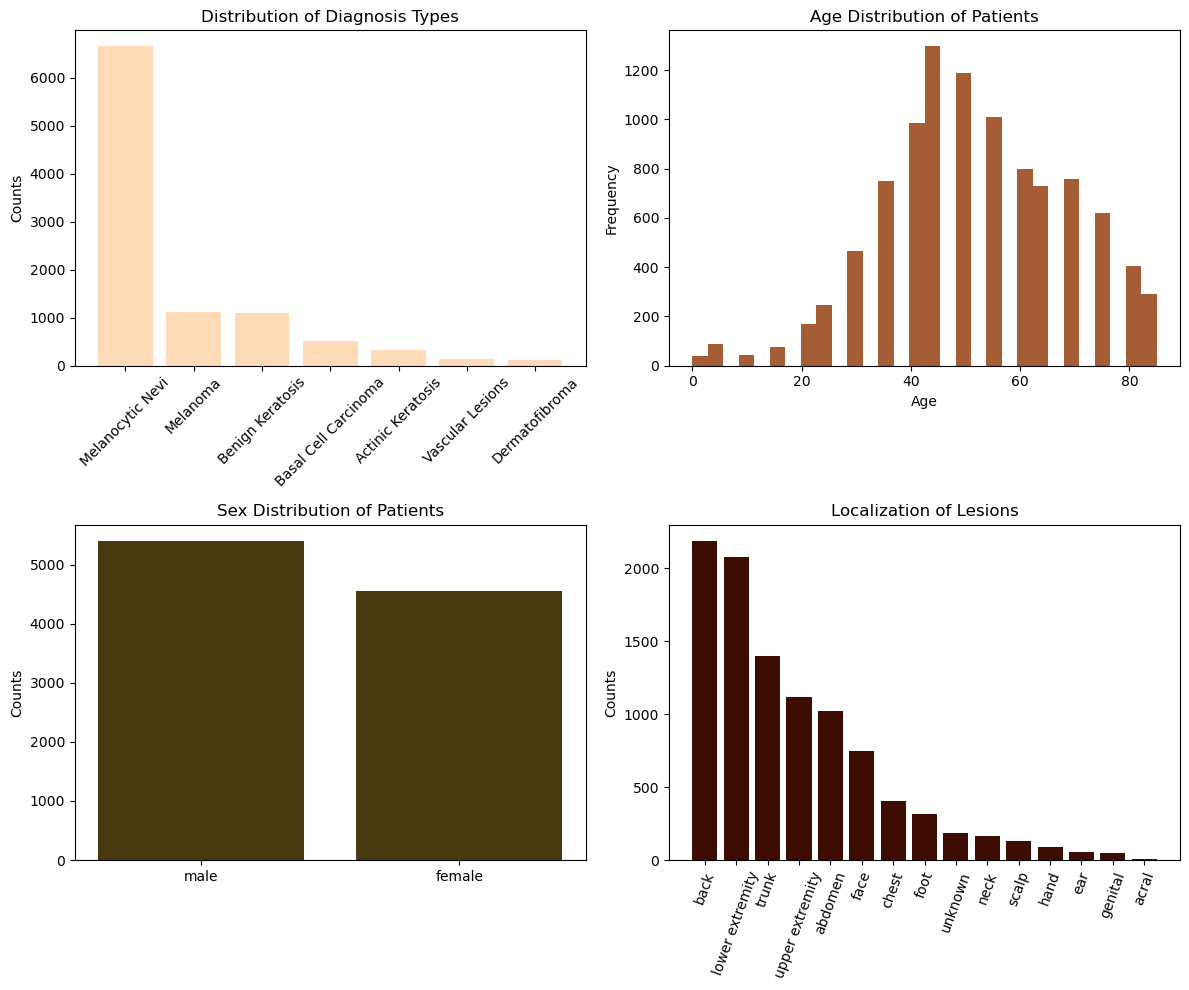

In [8]:
data['Diagnosis'] = data['Diagnosis'].replace(replacement_dict)

data = data[data['Sex'] != 'unknown']

diagnosis_counts = data['Diagnosis'].value_counts()

age_distribution = data['Age'].dropna()

sex_distribution = data['Sex'].value_counts()

localization_distribution = data['Localization'].value_counts()

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].bar(diagnosis_counts.index, diagnosis_counts.values, color='#FFDAB9')
axs[0, 0].set_title('Distribution of Diagnosis Types')
axs[0, 0].set_ylabel('Counts')
axs[0, 0].tick_params(axis='x', rotation=45)

axs[0, 1].hist(age_distribution, bins=30, color='#A55D35')
axs[0, 1].set_title('Age Distribution of Patients')
axs[0, 1].set_xlabel('Age')
axs[0, 1].set_ylabel('Frequency')

axs[1, 0].bar(sex_distribution.index, sex_distribution.values, color='#473810')
axs[1, 0].set_title('Sex Distribution of Patients')
axs[1, 0].set_ylabel('Counts')

axs[1, 1].bar(localization_distribution.index, localization_distribution.values, color='#3D0C02')
axs[1, 1].set_title('Localization of Lesions')
axs[1, 1].set_ylabel('Counts')
axs[1, 1].tick_params(axis='x', rotation=70)

plt.tight_layout()
plt.show()


### Interactive Bubble Plot
##### Created an interactive bubble plot to vizualize these demographics and diagnoses for our presentation.

In [9]:
import chart_studio.plotly as py
import chart_studio.tools as tls

bubble_data = data.groupby(['Diagnosis', 'Localization']).agg(
    Average_Age=('Age', 'mean'),
    Frequency=('Diagnosis', 'size')
).reset_index()

legend_order = ['Melanoma', 'Basal Cell Carcinoma', 'Actinic Keratosis', 'Vascular Lesions', 'Benign Keratosis', 'Dermatofibroma', 'Melanocytic Nevi']

bubble_data['Diagnosis'] = pd.Categorical(bubble_data['Diagnosis'], categories=legend_order, ordered=True)

diagnosis_colors = {
    'Melanoma': '#1d0200',
    'Actinic Keratosis': '#c44240',
    'Basal Cell Carcinoma': '#840000',
    'Vascular Lesions': '#fdd5b1',
    'Benign Keratosis': '#ff9a8a',
    'Dermatofibroma': '#bd6c48',
    'Melanocytic Nevi': '#8b4225'
}
fig = px.scatter(
    bubble_data,
    x='Average_Age',
    y='Localization',
    size='Frequency',
    color='Diagnosis',
        hover_name='Diagnosis',
    size_max=100,
    color_discrete_map=diagnosis_colors,
    category_orders={'Diagnosis': legend_order},
    labels={
        "Average_Age": "Average Age",
        "Localization": "Localization",
        "Diagnosis": "Diagnosis",
        "Frequency": "Frequency of Diagnoses"
    },
    title="An Overview of Our Data: Diagnosis Frequency by Localization and Average Age"
)

fig.update_layout(
    xaxis_title='Average Age',
    yaxis_title='Localization',
    legend_title='Diagnosis',
    height=800,
    width=1200,
    margin=dict(l=50, r=50, t=100, b=50),
    title={
        'text': "Diagnosis Frequency by Localization and Average Age",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show()

url = py.plot(fig, filename=',InteractiveBubbleChart', auto_open=True, sharing='public')
print("Your interactive plot is hosted at:", url)

Your interactive plot is hosted at: https://plotly.com/~nmitchell1219/3/
